### Import statements 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
import sklearn.metrics as skmetrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from fairlearn.metrics import false_positive_rate
from fairlearn.metrics import false_negative_rate
from fairlearn.metrics import mean_prediction
from fairlearn.metrics import demographic_parity_difference
from fairlearn.metrics import demographic_parity_ratio
from fairlearn.metrics import count
from fairlearn.postprocessing import ThresholdOptimizer
import shap

warnings.filterwarnings('ignore')

### Reading in data and exploratory data analysis

In [2]:
recruitmentdata =  pd.read_csv('/Users/guusjejuijn/Desktop/Scriptie/Programmeren/Scriptie/recruitmentdataset-2022-1.3.csv', 
                               delimiter = ',', skiprows = 1000, nrows=1000) #only include data from company B
recruitmentdata.shape

# Assigning column names 
recruitmentdata.columns = ["id", "gender", "age", "nationality", "sport","ind-university_grade", "ind-debateclub",
                          "ind-programming_exp", "ind-international_exp", "ind-entrepeneur_exp", "ind-languages", 
                          "ind-exact_study", "ind-degree", "company", "decision"]

recruitmentdata.head(5)

,id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x3312d,female,21,Dutch,Swimming,58,False,False,False,False,0,True,bachelor,B,False
1,x8441a,female,27,Dutch,Chess,67,False,False,True,False,0,True,master,B,False
2,x8679b,female,25,Dutch,Rugby,56,True,False,False,False,2,False,bachelor,B,True
3,x3415f,female,28,Dutch,Chess,64,False,False,True,False,0,True,master,B,False
4,x2611c,male,30,Dutch,Rugby,63,True,False,False,True,3,False,master,B,True


In [3]:
recruitmentdata['company'].value_counts() # Check if data indeed only includes company B 

B    1000
Name: company, dtype: int64

In [4]:
# Drop the columns that are not important for our analysis 
recruitmentdata.drop('id', axis=1, inplace=True) 
recruitmentdata.drop('sport', axis=1, inplace=True) 
recruitmentdata.drop('nationality', axis=1, inplace=True) 
recruitmentdata.drop('company', axis=1, inplace=True) 
recruitmentdata.head(5)

,gender,age,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,decision
0,female,21,58,False,False,False,False,0,True,bachelor,False
1,female,27,67,False,False,True,False,0,True,master,False
2,female,25,56,True,False,False,False,2,False,bachelor,True
3,female,28,64,False,False,True,False,0,True,master,False
4,male,30,63,True,False,False,True,3,False,master,True


In [58]:
recruitmentdata.info() # Check for missing values and data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 1000 non-null   object
 1   age                    1000 non-null   int64 
 2   ind-university_grade   1000 non-null   int64 
 3   ind-debateclub         1000 non-null   bool  
 4   ind-programming_exp    1000 non-null   bool  
 5   ind-international_exp  1000 non-null   bool  
 6   ind-entrepeneur_exp    1000 non-null   bool  
 7   ind-languages          1000 non-null   int64 
 8   ind-exact_study        1000 non-null   bool  
 9   ind-degree             1000 non-null   object
 10  decision               1000 non-null   bool  
dtypes: bool(6), int64(3), object(2)
memory usage: 45.0+ KB


In [5]:
# Ttransform boolean column types, and ind-languages column, into objects 
recruitmentdata['ind-debateclub'] = recruitmentdata['ind-debateclub'].astype('O')
recruitmentdata['ind-programming_exp'] = recruitmentdata['ind-programming_exp'].astype('O')
recruitmentdata['ind-international_exp'] = recruitmentdata['ind-international_exp'].astype('O')
recruitmentdata['ind-entrepeneur_exp'] = recruitmentdata['ind-entrepeneur_exp'].astype('O')
recruitmentdata['ind-exact_study'] = recruitmentdata['ind-exact_study'].astype('O')
recruitmentdata['decision'] = recruitmentdata['decision'].astype('O')

recruitmentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 1000 non-null   object
 1   age                    1000 non-null   int64 
 2   ind-university_grade   1000 non-null   int64 
 3   ind-debateclub         1000 non-null   object
 4   ind-programming_exp    1000 non-null   object
 5   ind-international_exp  1000 non-null   object
 6   ind-entrepeneur_exp    1000 non-null   object
 7   ind-languages          1000 non-null   int64 
 8   ind-exact_study        1000 non-null   object
 9   ind-degree             1000 non-null   object
 10  decision               1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [60]:
recruitmentdata.describe() # Describe the numerical data

,age,ind-university_grade,ind-languages
count,1000.00000,1000.000000,1000.000000
mean,26.30700,62.348000,1.375000
std,2.81081,6.015237,0.856217
min,21.00000,47.000000,0.000000
25%,24.00000,58.000000,1.000000
50%,26.00000,62.000000,1.000000
75%,28.00000,67.000000,2.000000
max,32.00000,78.000000,3.000000


In [61]:
recruitmentdata.describe(include='O') # Describe the categorical data

,gender,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-exact_study,ind-degree,decision
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,2,2,2,2,2,3,2
top,male,False,False,False,False,False,bachelor,False
freq,530,754,685,767,755,539,495,691


The percentage of negative recruitment decisions : 0.69
The percentage of positive recruitment decisions: 0.31



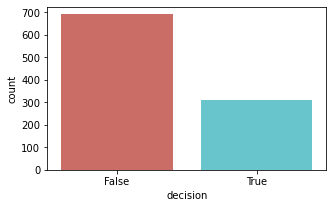

In [62]:
# Plot distribution of target variable (0 = false (not hired), 1 = true (hired))

plt.figure(figsize=(5,3))
sn.countplot(recruitmentdata.decision, palette="hls");

print('The percentage of negative recruitment decisions : %.2f' % (recruitmentdata['decision'].value_counts()[0] / len(recruitmentdata)))
print('The percentage of positive recruitment decisions: %.2f' % (recruitmentdata['decision'].value_counts()[1] / len(recruitmentdata)))
print()

<AxesSubplot:xlabel='ind-degree', ylabel='count'>

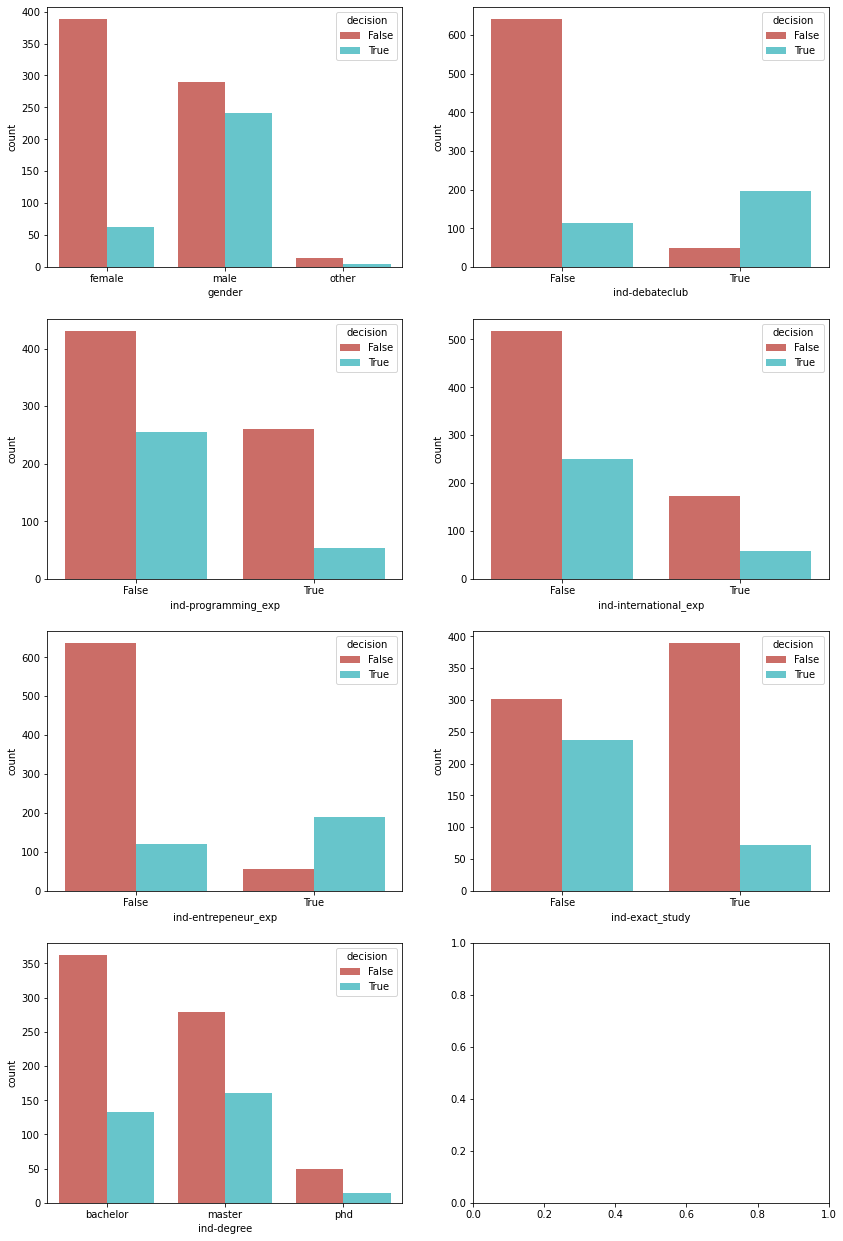

In [10]:
# Create count plots of all categorical attributes (decision 0 = not hired, decision 1 = hired)

fig, axs = plt.subplots(4,2,figsize=(14, 22))

sn.countplot(recruitmentdata.gender, hue=recruitmentdata.decision, palette = "hls", ax=axs[0,0])
sn.countplot(recruitmentdata['ind-debateclub'], hue=recruitmentdata.decision, palette = "hls", ax=axs[0,1])
sn.countplot(recruitmentdata['ind-programming_exp'], hue=recruitmentdata.decision, palette = "hls", ax=axs[1,0])
sn.countplot(recruitmentdata['ind-international_exp'], hue=recruitmentdata.decision, palette = "hls", ax=axs[1,1])
sn.countplot(recruitmentdata['ind-entrepeneur_exp'], hue=recruitmentdata.decision, palette = "hls", ax=axs[2,0])
sn.countplot(recruitmentdata['ind-exact_study'], hue=recruitmentdata.decision, palette = "hls", ax=axs[2,1])
sn.countplot(recruitmentdata['ind-degree'], hue=recruitmentdata.decision, palette = "hls", ax=axs[3,0])


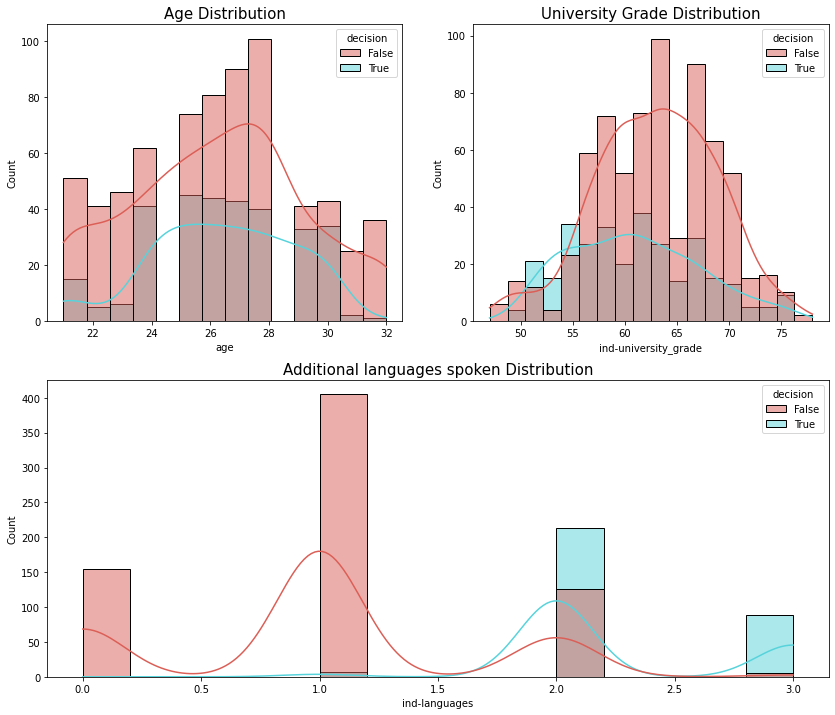

In [64]:
# Create histograms of all numerical attributes (decision 0 = not hired, 1 = hired)

plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sn.histplot(data=recruitmentdata, x='age', hue='decision', palette='hls', kde=True)
ax1.set_title("Age Distribution", fontsize=15)

plt.subplot(222)
ax1 = sn.histplot(data=recruitmentdata, x='ind-university_grade', hue='decision', palette='hls', kde=True)
ax1.set_title("University Grade Distribution", fontsize=15)

plt.subplot(212)
ax1 = sn.histplot(data=recruitmentdata, x='ind-languages', hue='decision', palette='hls', kde=True)
ax1.set_title("Additional languages spoken Distribution", fontsize=15)

plt.show()

#### Look for disparate impact in data set, using sex as sensitive attribute 

In [11]:
recruitmentdata['gender'].value_counts() #Since the data largely contains male and female subjects, 
                                        # For conveninience, we only choose to use these two sexes in this analysis

male      530
female    451
other      19
Name: gender, dtype: int64

In [12]:
# Look for disparate impact in the data set, using column info 

female = recruitmentdata.loc[recruitmentdata['gender'] == "female"] 
male = recruitmentdata.loc[recruitmentdata['gender'] == "male"] 

favorable_female = female.loc[female['decision'] == 1] 
unfavorable_female = female.loc[female['decision'] == 0] 
print("Number of females who get hired: ", len(favorable_female)) 
print("Number of females who do not get hired: ", len(unfavorable_female)) 
prop_female_favorable = len(favorable_female)/len(female)
print("Proportion of females receiving the favorable outcome: ", prop_female_favorable) 
print()

favorable_male = male.loc[male['decision'] == 1] 
unfavorable_male = male.loc[male['decision'] == 0]
print("Number of males who get hired: ", len(favorable_male)) 
print("Number of males who do not get hired: ", len(unfavorable_male)) 
prop_male_favorable = len(favorable_male)/len(male)
print("Proportion of males receiving the favorable outcome: ", prop_male_favorable) 
print()

disparate_impact = prop_female_favorable / prop_male_favorable
print("The disparate impact ratio between the unprivileged (females) group and privileged group (males) is : %.2f " % disparate_impact)

Number of females who get hired:  63
Number of females who do not get hired:  388
Proportion of females receiving the favorable outcome:  0.13968957871396895

Number of males who get hired:  241
Number of males who do not get hired:  289
Proportion of males receiving the favorable outcome:  0.4547169811320755

The disparate impact ratio between the unprivileged (females) group and privileged group (males) is : 0.31 


####  We can conclude that this data set is highly biased against females: the disparate impact ratio is 0.3

### Splitting data into train and test set 

In [67]:
input_attributes = recruitmentdata.iloc[0:,0:12] # Split the data into input attributes and target attribute 
target_attribute = recruitmentdata['decision']

cat_columns = ["gender", "ind-debateclub", "ind-programming_exp", 
               "ind-international_exp", "ind-entrepeneur_exp",
                "ind-exact_study", "ind-degree"]
num_columns = ["age", "ind-university_grade", "ind-languages"]

X = input_attributes[cat_columns + num_columns]

# Split data into train and test set. Change target attribute into int, since now it is an object type which sklearn cannot recognize
x_train, x_test, y_train, y_test = train_test_split(X, target_attribute.astype('int'), test_size=0.25, random_state=42)

x_train.reset_index(drop=True, inplace=True) # Reset indices
x_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Preprocessing: one-hot encoding the categorical attributes, scale the numerical features and define sensitive features

In [68]:
encoder = OneHotEncoder()
scaler=MinMaxScaler()

preprocessing = ColumnTransformer(
    [
        ("categorical", encoder, cat_columns),
        ("numerical", scaler, num_columns)
    ],
    verbose_feature_names_out=False,
)

In [69]:
gender = x_test['gender'] # Define sensitive features 
gender.value_counts()

male      124
female    122
other       4
Name: gender, dtype: int64

### Logistic Regression

In [70]:
unmitigated_lr = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", LogisticRegression(C=10,random_state=42)),
    ]
)
unmitigated_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['gender', 'ind-debateclub',
                                                   'ind-programming_exp',
                                                   'ind-international_exp',
                                                   'ind-entrepeneur_exp',
                                                   'ind-exact_study',
                                                   'ind-degree']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['age',
                                                   'ind-university_grade',
                                                   'ind-languages'])],
                                   verbose_feature_names_out=False)),
                ('classifier', LogisticRegression(C=10, random_state=42))])

In [71]:
print(f"LR train accuracy: {unmitigated_lr.score(x_train, y_train):.3f}")
print(f"LR test accuracy: {unmitigated_lr.score(x_test, y_test):.3f}")

LR train accuracy: 0.884
LR test accuracy: 0.864


In [73]:
predictions_lr = unmitigated_lr.predict(x_test)
predictions_lr

print(skmetrics.classification_report(y_test, predictions_lr)) 

conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr)
print(conf_matrix)  

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       177
           1       0.77      0.77      0.77        73

    accuracy                           0.86       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.86      0.86      0.86       250

[[160  17]
 [ 17  56]]


In [74]:
# Show metrics per group
metrics = {"accuracy":accuracy_score, "selection rate": selection_rate, "mean prediction": mean_prediction,
           "false positive rate": false_positive_rate, "false negative rate": false_negative_rate, "count": count}
mf_lr = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr,
    sensitive_features=gender)

print("Metrics by group: ") 
mf_lr.by_group


Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
gender,,,,,,
female,0.926230,0.114754,0.114754,0.037383,0.333333,122.0
male,0.814516,0.467742,0.467742,0.179104,0.192982,124.0
other,0.500000,0.250000,0.250000,0.333333,1.000000,4.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='gender'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'count'}, xlabel='gender'>],
       [<AxesSubplot:xlabel='gender'>, <AxesSubplot:xlabel='gender'>,
        <AxesSubplot:xlabel='gender'>]], dtype=object)

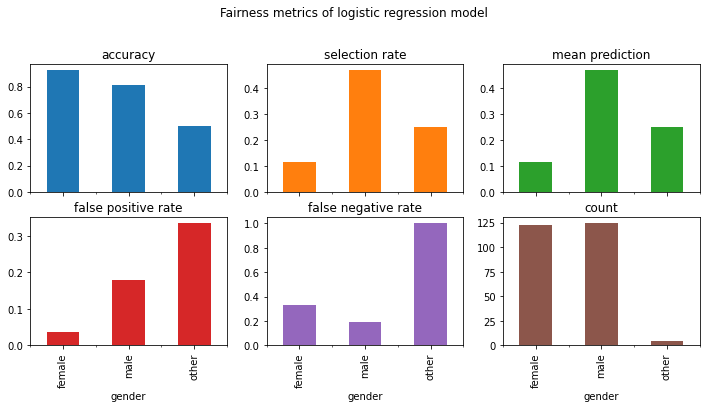

In [75]:
# Plot metrics by group
mf_lr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Fairness metrics of logistic regression model",
)

###  Investigate feature importance

In [86]:
featureimportance = pd.DataFrame(data={
                                'Feature': preprocessing.get_feature_names_out(),
                                 'Importance': unmitigated_lr['classifier'].coef_[0]})
featureimportance = featureimportance.sort_values(by='Importance', ascending=False) # Sorted dataframe of all features and their coefficients

pd.qcut(featureimportance['Importance'], q=11)  #Divide all features up into 11 buckets (+++++ to -----)
binned = pd.qcut(featureimportance['Importance'], q=11)
binned_df = pd.DataFrame(binned)

binned_df['Feature'] = featureimportance['Feature']
print(binned_df)


          Importance                      Feature
18    (0.697, 9.677]                ind-languages
14    (0.697, 9.677]            ind-degree_master
17    (0.455, 0.697]         ind-university_grade
4     (0.455, 0.697]          ind-debateclub_True
11    (0.331, 0.455]        ind-exact_study_False
1     (0.209, 0.331]                  gender_male
10    (0.209, 0.331]     ind-entrepeneur_exp_True
5     (0.101, 0.209]    ind-programming_exp_False
7     (0.101, 0.209]  ind-international_exp_False
2    (-0.118, 0.101]                 gender_other
8   (-0.209, -0.118]   ind-international_exp_True
6   (-0.209, -0.118]     ind-programming_exp_True
9    (-0.29, -0.209]    ind-entrepeneur_exp_False
0    (-0.29, -0.209]                gender_female
12   (-0.359, -0.29]         ind-exact_study_True
15  (-0.456, -0.359]               ind-degree_phd
13  (-0.456, -0.359]          ind-degree_bachelor
3   (-1.003, -0.456]         ind-debateclub_False
16  (-1.003, -0.456]                          age


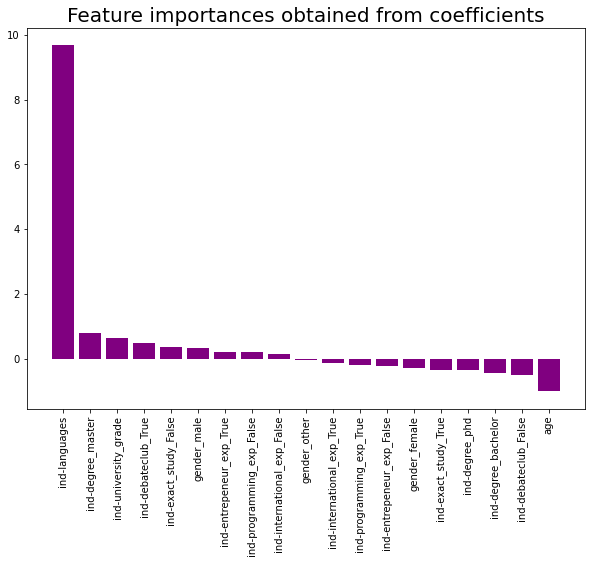

In [88]:
# Plot of all features and their belonging coefficients 
plt.figure(figsize=(10,7))
plt.bar(x=featureimportance['Feature'], height=featureimportance['Importance'], color='purple')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


### Bias mitigation 

In [76]:
#Postprocessing for demographic parity 

postprocess_dp = ThresholdOptimizer(estimator=unmitigated_lr, constraints="demographic_parity", 
                                     objective="accuracy_score",prefit=True,predict_method='predict_proba')

postprocess_dp.fit(x_train, y_train, sensitive_features = x_train['gender'])

ThresholdOptimizer(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'ind-debateclub',
                                                                                'ind-programming_exp',
                                                                                'ind-international_exp',
                                                                                'ind-entrepeneur_exp',
                                                                                'ind-exact_study',
                                                                                'ind-degree']),
                                                                              ('numerical',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'ind-university_grade',
                                                                                'ind-languages'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              LogisticRegression(C=10,
                                                                 random_state=42))]),
                   predict_method='predict_proba', prefit=True)

In [77]:
predictions_lr_postpr = postprocess_dp.predict(x_test, sensitive_features=gender)

print(skmetrics.classification_report(y_test, predictions_lr_postpr)) 
print()
conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr_postpr)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       177
           1       0.71      0.53      0.61        73

    accuracy                           0.80       250
   macro avg       0.77      0.72      0.74       250
weighted avg       0.79      0.80      0.79       250


[[161  16]
 [ 34  39]]


In [78]:
# Show metrics by group after mitigation
mf_lr_postpr = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr_postpr,
    sensitive_features=gender)

print("Metrics by group: ") 
mf_lr_postpr.by_group

Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
gender,,,,,,
female,0.893443,0.196721,0.196721,0.102804,0.133333,122.0
male,0.717742,0.241935,0.241935,0.059701,0.543860,124.0
other,0.500000,0.250000,0.250000,0.333333,1.000000,4.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='gender'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'count'}, xlabel='gender'>],
       [<AxesSubplot:xlabel='gender'>, <AxesSubplot:xlabel='gender'>,
        <AxesSubplot:xlabel='gender'>]], dtype=object)

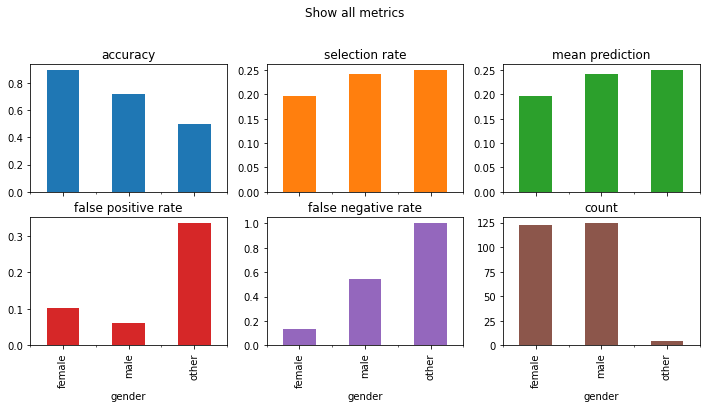

In [79]:
# Plot metrics by group after mitigation 
mf_lr_postpr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [80]:
# Postprocessing for equality of opportunity 

postprocess_eqo = ThresholdOptimizer(estimator=unmitigated_lr, constraints="false_negative_rate_parity", 
                                     objective="accuracy_score",prefit=True,predict_method='predict_proba')

postprocess_eqo.fit(x_train, y_train, sensitive_features = x_train['gender'])

ThresholdOptimizer(constraints='false_negative_rate_parity',
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['gender',
                                                                                'ind-debateclub',
                                                                                'ind-programming_exp',
                                                                                'ind-international_exp',
                                                                                'ind-entrepeneur_exp',
                                                                                'ind-exact_study',
                                                                                'ind-degree']),
                                                                              ('numerical',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'ind-university_grade',
                                                                                'ind-languages'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              LogisticRegression(C=10,
                                                                 random_state=42))]),
                   predict_method='predict_proba', prefit=True)

In [81]:
predictions_lr_postpr_eqo = postprocess_eqo.predict(x_test, sensitive_features=gender)

print(skmetrics.classification_report(y_test, predictions_lr_postpr_eqo)) 
print()
conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr_postpr_eqo)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.76      0.81      0.78        73

    accuracy                           0.87       250
   macro avg       0.84      0.85      0.84       250
weighted avg       0.87      0.87      0.87       250


[[158  19]
 [ 14  59]]


In [82]:
# Show metrics by group after mitigation
mf_lr_postpr = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr_postpr_eqo,
    sensitive_features=gender)

print("Metrics by group: ") 
mf_lr_postpr.by_group

Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
gender,,,,,,
female,0.918033,0.172131,0.172131,0.074766,0.133333,122.0
male,0.822581,0.443548,0.443548,0.149254,0.210526,124.0
other,0.750000,0.500000,0.500000,0.333333,0.000000,4.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='gender'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='gender'>,
        <AxesSubplot:title={'center':'count'}, xlabel='gender'>],
       [<AxesSubplot:xlabel='gender'>, <AxesSubplot:xlabel='gender'>,
        <AxesSubplot:xlabel='gender'>]], dtype=object)

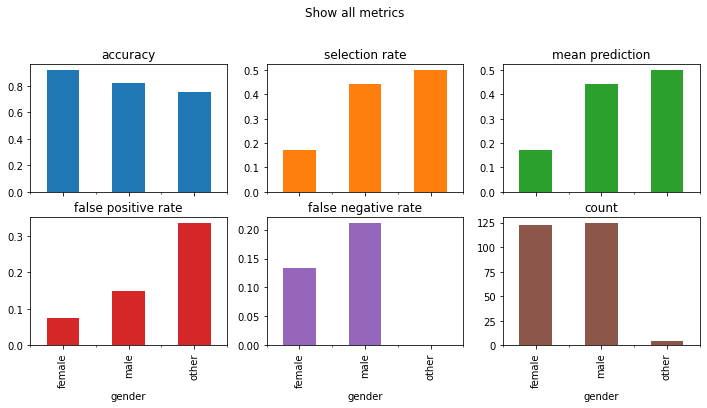

In [83]:
# Plot metrics by group after mitigation 
mf_lr_postpr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)